In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [3]:
class wf_interaction:
    def __init__(self, e0, v, x):
        self.x = x
        self.e0 = e0
        self.v = v
        self.h_cut = 1
        self.m_e = 1
        
    def normalise(self, wf):
        prob_den = abs(wf)**2
        norm = 1/np.sqrt(sci.simps(prob_den, self.x))
        return norm

    def transmission(self):
        k = np.sqrt(2* self.m_e *(self.e0- self.v))
        p = self.h_cut * k
        # psi(x) = N*exp(i*k*x) 
        # we will only write the real part
        wf = np.cos(k*self.x)
        N = self.normalise(wf)
        wf = N*wf
        return wf
    
    def tunneling(self):
        k = np.sqrt(2*self.m_e*(self.v-self.e0))
        # exp(kx) = (cosh(kx) + sinh(kx))/2
        # exp(-kx) = (cosh(kx) - sinh(kx))/2
        wf = (np.cosh(k*self.x) - np.sinh(k*self.x))/2
        N = self.normalise(wf)
        wf = N*wf
        return wf
    
    def original_wf(self):
        k = np.sqrt(2*self.m_e*self.e0)
        wf = np.cos(k*self.x)
        return wf

    def interact(self):
        if self.v!= 0:
            ratio = self.e0/self.v
            if ratio>=1:
                # transmission
                transmitted_wf = self.transmission()
                return transmitted_wf
            elif ratio< 1 and ratio >= 0.01:
                # tunneling
                tunneled_wf = self.tunneling()
                return tunneled_wf
            elif ratio < 0.01:
                # infinte barrier condition
                wf_limit = 0
                return wf_limit 
        else: # v= 0
            # no potential barrier
            og_wf = self.original_wf()
            return og_wf

In [4]:
x_range = np.arange(-10,10.01,0.01)
e0 = 2
v_a = 0
v_b = 1
v_c = 3

In [5]:
# wf interacting with the different potential barrier
interaction_1 = wf_interaction(e0, v_a, x_range)
interaction_2 = wf_interaction(e0, v_b, x_range)
interaction_3 = wf_interaction(e0, v_c, x_range)

In [6]:
pd1 = abs(interaction_1.interact())**2
pd2 = abs(interaction_2.interact())**2
pd3 = abs(interaction_3.interact())**2

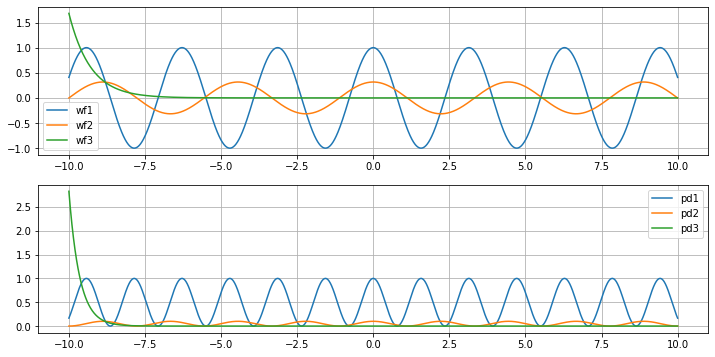

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(x_range, interaction_1.interact(), label = 'wf1')
plt.plot(x_range, interaction_2.interact(), label = 'wf2')
plt.plot(x_range, interaction_3.interact(), label = 'wf3')
plt.grid()
plt.legend()
plt.subplot(2,1,2)
plt.plot(x_range, pd1, label = 'pd1')
plt.plot(x_range, pd2, label = 'pd2')
plt.plot(x_range, pd3, label = 'pd3')
plt.grid()
plt.legend()